In [ ]:
!python --version

Python 3.6.9


In [ ]:
!pip install geopandas
!pip install geopy

In [ ]:
import sklearn

# Common imports
import numpy as np
import os
import geopandas
import geopy

# Setting random seed
np.random.seed(42)

# setting up matplot
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Saving the actual figures
PROJECT_ROOT_DIR = "."

In [ ]:
import tarfile
from six.moves import urllib

DOWNLOAD_URL = 'https://query.data.world/s/ldg6mnpuzhacnymhqhmd6sf7f2sa35'
DATA_PATH = os.path.join('datasets', 'cancer')

def fetch_data(data_url=DOWNLOAD_URL, data_path=DATA_PATH):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)

fetch_data()

In [ ]:
import pandas as pd

def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "cancer_reg.csv")
    return pd.read_csv(csv_path, encoding = "ISO-8859-1")

In [ ]:
cancer_data = load_data()
cancer_data.head(10)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
5,428.0,152,176.0,505.4,52313,61023,15.6,180.259902,"(51046.4, 54545.6]",45.4,43.5,48.0,"Mason County, Washington",2.58,50.4,29.9,35.1,NaN,4.5,30.4,11.9,44.1,12.9,60.0,38.8,32.6,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476
6,250.0,97,175.9,461.8,37782,41516,23.2,0.000000,"(37413.8, 40362.7]",42.6,42.2,43.5,"Okanogan County, Washington",2.42,54.1,26.1,41.4,NaN,5.8,29.8,11.9,51.8,8.9,49.5,35.0,28.3,46.4,28.7,75.106455,0.616955,0.866157,8.356721,51.013900,4.204317
7,146.0,71,183.6,404.0,40189,20848,17.8,0.000000,"(37413.8, 40362.7]",51.7,50.8,52.5,"Pacific County, Washington",2.24,52.7,27.3,33.9,36.5,2.2,31.6,11.3,40.9,8.9,55.8,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
8,88.0,36,190.5,459.4,42579,13088,22.3,0.000000,"(40362.7, 42724.4]",49.3,48.4,49.8,"Pend Oreille County, Washington",2.38,55.9,34.7,39.4,NaN,1.4,32.2,12.0,39.5,10.3,55.5,37.8,29.9,48.1,26.6,91.787477,0.185071,0.208205,0.616903,53.446998,5.587583
9,4025.0,1380,177.8,510.9,60397,843954,13.1,427.748432,"(54545.6, 61494.5]",35.8,34.7,37.0,"Pierce County, Washington",2.65,50.0,15.6,36.3,NaN,7.1,28.8,16.2,56.6,9.2,69.9,NaN,44.4,31.4,16.5,74.729668,6.710854,6.041472,2.699184,50.063573,5.533430


In [ ]:
len(cancer_data)

3047

In [ ]:
virginia_cancer_data = cancer_data[cancer_data['Geography'].str.contains(', Virginia')]
virginia_cancer_data_geo = cancer_data[cancer_data['Geography'].str.contains(', Virginia')]

In [ ]:
len(virginia_cancer_data)

125

In [ ]:
virginia_cancer_data2 = virginia_cancer_data.dropna(axis='columns')
len(virginia_cancer_data2)

125

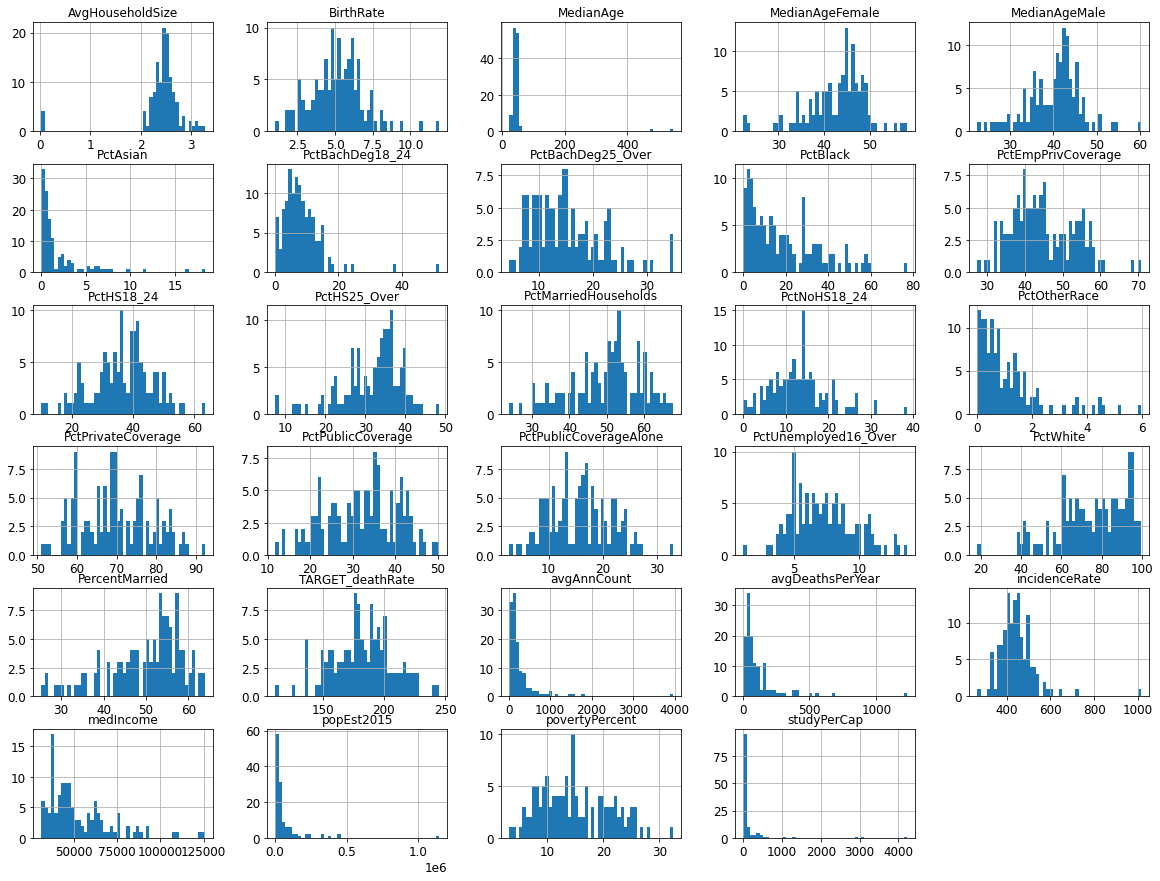

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
virginia_cancer_data2.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
corr_matrix = virginia_cancer_data2.corr()
corr_matrix['TARGET_deathRate'].sort_values(ascending=False)

TARGET_deathRate          1.000000
PctPublicCoverageAlone    0.624620
PctUnemployed16_Over      0.615566
PctPublicCoverage         0.547804
povertyPercent            0.474889
PctHS25_Over              0.419704
PctBlack                  0.326371
PctHS18_24                0.246619
incidenceRate             0.218130
PctNoHS18_24              0.174462
MedianAgeFemale           0.074372
BirthRate                 0.073476
MedianAgeMale            -0.028653
studyPerCap              -0.073191
MedianAge                -0.076654
AvgHouseholdSize         -0.141497
PctWhite                 -0.212007
PctOtherRace             -0.217901
avgDeathsPerYear         -0.233816
avgAnnCount              -0.278072
popEst2015               -0.327533
PercentMarried           -0.328091
PctMarriedHouseholds     -0.369004
PctAsian                 -0.425574
PctBachDeg18_24          -0.430977
PctEmpPrivCoverage       -0.491960
medIncome                -0.557623
PctBachDeg25_Over        -0.575756
PctPrivateCoverage  

In [ ]:
corr = virginia_cancer_data2.corr()
corr.style.background_gradient(cmap='coolwarm')

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.989973,-0.278072,-0.042913,0.424781,0.977892,-0.228918,-0.034520,-0.047324,-0.302158,-0.291140,0.185546,-0.007657,-0.076562,-0.243377,0.299039,-0.469551,0.461523,-0.106899,0.263553,0.248694,-0.375701,-0.280669,-0.229199,0.060660,0.657311,0.422039,0.028210,0.030204
avgDeathsPerYear,0.989973,1.000000,-0.233816,-0.079711,0.384331,0.957897,-0.203148,-0.044159,-0.042022,-0.312123,-0.290129,0.189635,-0.022521,-0.079281,-0.232342,0.274988,-0.457068,0.433044,-0.070865,0.222339,0.206760,-0.341063,-0.237428,-0.237284,0.077826,0.616964,0.406108,0.001203,0.044509
TARGET_deathRate,-0.278072,-0.233816,1.000000,0.218130,-0.557623,-0.327533,0.474889,-0.073191,-0.076654,-0.028653,0.074372,-0.141497,-0.328091,0.174462,0.246619,-0.430977,0.419704,-0.575756,0.615566,-0.581693,-0.491960,0.547804,0.624620,-0.212007,0.326371,-0.425574,-0.217901,-0.369004,0.073476
incidenceRate,-0.042913,-0.079711,0.218130,1.000000,-0.098743,-0.100450,0.172874,-0.037850,-0.104068,-0.356198,-0.376791,-0.147515,-0.483875,-0.125720,-0.170856,-0.002165,-0.119684,0.120913,0.137676,0.104010,0.073639,-0.127282,-0.074610,-0.333010,0.324487,0.071861,-0.030685,-0.373389,-0.204275
medIncome,0.424781,0.384331,-0.557623,-0.098743,1.000000,0.494349,-0.806088,-0.097170,-0.021154,-0.138001,-0.209594,0.352187,0.422537,-0.083064,-0.191848,0.587246,-0.626713,0.791051,-0.512201,0.806550,0.781234,-0.804504,-0.808102,0.020764,-0.215835,0.636219,0.524129,0.514227,-0.049058
popEst2015,0.977892,0.957897,-0.327533,-0.100450,0.494349,1.000000,-0.254943,-0.021220,-0.055419,-0.310372,-0.313070,0.210301,0.019334,-0.067877,-0.262253,0.342622,-0.502573,0.500760,-0.145907,0.294519,0.297898,-0.425899,-0.323651,-0.209561,0.018624,0.733049,0.489862,0.066687,0.051538
povertyPercent,-0.228918,-0.203148,0.474889,0.172874,-0.806088,-0.254943,1.000000,0.046151,-0.077250,-0.229230,-0.146580,-0.371707,-0.714420,0.038282,-0.172653,-0.303371,0.254252,-0.501404,0.574227,-0.717427,-0.612457,0.599412,0.726211,-0.241117,0.344149,-0.262354,-0.250933,-0.700291,-0.082312
studyPerCap,-0.034520,-0.044159,-0.073191,-0.037850,-0.097170,-0.021220,0.046151,1.000000,-0.040431,0.007592,-0.075838,-0.033732,-0.040456,-0.077188,0.064255,-0.046522,0.017064,0.006885,-0.034096,-0.075356,-0.027019,0.072875,0.095588,0.123086,-0.145135,0.071278,0.003743,-0.142997,0.008476
MedianAge,-0.047324,-0.042022,-0.076654,-0.104068,-0.021154,-0.055419,-0.077250,-0.040431,1.000000,0.137876,0.127164,0.009185,0.157582,-0.009469,0.179904,-0.100062,0.109562,-0.098704,0.000562,-0.050566,-0.019092,0.044022,0.035103,0.070757,-0.047214,-0.102294,-0.023700,0.107648,-0.080892
MedianAgeMale,-0.302158,-0.312123,-0.028653,-0.356198,-0.138001,-0.310372,-0.229230,0.007592,0.137876,1.000000,0.942255,-0.120802,0.626438,0.251221,0.515887,-0.206908,0.473765,-0.384109,-0.184126,-0.177876,-0.347558,0.502024,0.176184,0.325544,-0.187434,-0.478732,-0.415654,0.403200,0.127980


In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

testing = correlation(virginia_cancer_data2, .5)
virginia_cancer_data = pd.DataFrame(testing)

In [ ]:
virginia_cancer_data

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,Geography,AvgHouseholdSize,PctNoHS18_24,PctHS25_Over,PctWhite,PctBlack,BirthRate
200,335.0,194.2,437.1,34842,20.5,19.274879,"(34218.1, 37413.8]",46.0,43.6,"Henry County, Virginia",2.32,12.8,34.1,73.335869,22.280335,6.007453
201,12.0,111.3,327.0,38636,14.6,0.000000,"(37413.8, 40362.7]",59.0,60.2,"Highland County, Virginia",2.10,16.1,38.6,99.509804,0.000000,10.791367
202,205.0,200.6,460.2,64350,10.2,0.000000,"(61494.5, 125635]",44.5,43.4,"Isle of Wight County, Virginia",2.57,14.1,27.7,71.821489,22.775602,3.667228
203,410.0,149.0,423.0,75926,7.9,27.342201,"(61494.5, 125635]",45.4,43.4,"James City County, Virginia",2.49,13.5,21.1,80.285257,13.542654,4.819607
204,38.0,180.3,383.4,46331,14.8,0.000000,"(45201, 48021.6]",45.9,42.8,"King and Queen County, Virginia",2.46,20.9,41.1,68.815086,26.540951,9.290030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,85.0,156.5,404.0,61762,9.6,0.000000,"(61494.5, 125635]",481.2,39.4,"Greene County, Virginia",2.64,7.1,34.9,88.446510,6.584645,3.450672
992,69.0,174.7,492.2,36459,25.1,0.000000,"(34218.1, 37413.8]",42.9,41.5,"Greensville County, Virginia",2.17,18.1,42.3,39.506803,58.044218,1.886792
993,211.0,178.3,412.7,39079,18.0,28.469751,"(37413.8, 40362.7]",45.3,43.1,"Halifax County, Virginia",2.43,15.6,36.5,60.494001,36.926153,5.521049
994,568.0,163.7,496.6,81940,6.1,106.561268,"(61494.5, 125635]",41.9,40.4,"Hanover County, Virginia",2.65,13.4,27.6,86.440695,9.299388,4.125166


In [ ]:
import time
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Highland County, Virginia')
print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

#hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
y_pred = list()
latitude = list()
longitude = list()

count = 0
for row in virginia_cancer_data['Geography'].T:
    time.sleep(.1)
    cry = str(row)
    location = locator.geocode(cry)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

Latitude = 38.386039499999995, Longitude = -79.51798530574015


In [ ]:
latitude2 = pd.DataFrame(latitude)
#print(latitude2.head)
longitude2 = pd.DataFrame(longitude)
#print(longitude2.head)

combined = pd.concat([longitude2, latitude2], axis = 1)
# combined = pd.concat([latitude2, longitude2], names=['Latitude', 'Longitude'])
# print(combined.head)

combined = pd.DataFrame(combined.set_axis(['Longitude', "Latitude"], axis=1, inplace=False ))
combined

,Longitude,Latitude
0,-79.924292,36.672581
1,-79.517985,38.386039
2,-76.724814,36.895368
3,-76.797252,37.321148
4,-76.879416,37.719675
...,...,...
120,-78.470482,38.295450
121,-77.576830,36.640571
122,-78.942563,36.747244
123,-77.446416,37.744783


In [ ]:
virginia_cancer_data_new = virginia_cancer_data.drop('Geography', axis=1)
virginia_cancer_data_new = virginia_cancer_data_new.drop('binnedInc', axis=1)

In [ ]:
virginia_cancer_data_new

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,AvgHouseholdSize,PctNoHS18_24,PctHS25_Over,PctWhite,PctBlack,BirthRate
200,335.0,194.2,437.1,34842,20.5,19.274879,46.0,43.6,2.32,12.8,34.1,73.335869,22.280335,6.007453
201,12.0,111.3,327.0,38636,14.6,0.000000,59.0,60.2,2.10,16.1,38.6,99.509804,0.000000,10.791367
202,205.0,200.6,460.2,64350,10.2,0.000000,44.5,43.4,2.57,14.1,27.7,71.821489,22.775602,3.667228
203,410.0,149.0,423.0,75926,7.9,27.342201,45.4,43.4,2.49,13.5,21.1,80.285257,13.542654,4.819607
204,38.0,180.3,383.4,46331,14.8,0.000000,45.9,42.8,2.46,20.9,41.1,68.815086,26.540951,9.290030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,85.0,156.5,404.0,61762,9.6,0.000000,481.2,39.4,2.64,7.1,34.9,88.446510,6.584645,3.450672
992,69.0,174.7,492.2,36459,25.1,0.000000,42.9,41.5,2.17,18.1,42.3,39.506803,58.044218,1.886792
993,211.0,178.3,412.7,39079,18.0,28.469751,45.3,43.1,2.43,15.6,36.5,60.494001,36.926153,5.521049
994,568.0,163.7,496.6,81940,6.1,106.561268,41.9,40.4,2.65,13.4,27.6,86.440695,9.299388,4.125166


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

virginia_cancer_data_scaled = pd.DataFrame(pipeline.fit_transform(virginia_cancer_data_new), columns=virginia_cancer_data_new.columns)

In [ ]:
virginia_cancer_data_scaled

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,AvgHouseholdSize,PctNoHS18_24,PctHS25_Over,PctWhite,PctBlack,BirthRate
0,0.112694,0.475003,-0.101620,-0.974073,0.905040,-0.252720,-0.050442,0.568149,-0.189817,-0.038832,0.316007,-0.136321,0.216866,0.469270
1,-0.606902,-2.918460,-1.404649,-0.770958,-0.062023,-0.288011,0.167328,3.327765,-0.643298,0.460182,0.927264,1.411465,-1.154523,3.195302
2,-0.176927,0.736983,0.171768,0.605660,-0.783223,-0.288011,-0.075569,0.534900,0.325502,0.157749,-0.553338,-0.225873,0.247351,-0.864267
3,0.279782,-1.375233,-0.268493,1.225390,-1.160214,-0.237949,-0.060493,0.534900,0.160600,0.067019,-1.449849,0.274628,-0.320952,-0.207604
4,-0.548978,-0.093985,-0.737157,-0.359001,-0.029241,-0.288011,-0.052117,0.435155,0.098762,1.186021,1.266852,-0.403656,0.479114,2.339791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-0.444269,-1.068225,-0.493357,0.467110,-0.881568,-0.288011,7.239816,-0.130068,0.469791,-0.900767,0.424675,0.757241,-0.749228,-0.987668
121,-0.479914,-0.323218,0.550487,-0.887506,1.659022,-0.288011,-0.102372,0.219040,-0.499009,0.762615,1.429854,-2.136790,2.418189,-1.878818
122,-0.163560,-0.175854,-0.390393,-0.747242,0.495268,-0.235885,-0.062168,0.485028,0.036923,0.384574,0.642011,-0.895720,1.118339,0.192101
123,0.631782,-0.773497,0.602560,1.547355,-1.455250,-0.092903,-0.119123,0.036174,0.490404,0.051898,-0.566921,0.638628,-0.582131,-0.603319


In [ ]:
# virginia_cancer_data = virginia_cancer_data.reset_index()
# combined = combined.reset_index()
virginia_cancer_data_combined = pd.concat([combined, virginia_cancer_data_scaled], axis=1)
virginia_cancer_data_combined

,Longitude,Latitude,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,AvgHouseholdSize,PctNoHS18_24,PctHS25_Over,PctWhite,PctBlack,BirthRate
0,-79.924292,36.672581,0.112694,0.475003,-0.101620,-0.974073,0.905040,-0.252720,-0.050442,0.568149,-0.189817,-0.038832,0.316007,-0.136321,0.216866,0.469270
1,-79.517985,38.386039,-0.606902,-2.918460,-1.404649,-0.770958,-0.062023,-0.288011,0.167328,3.327765,-0.643298,0.460182,0.927264,1.411465,-1.154523,3.195302
2,-76.724814,36.895368,-0.176927,0.736983,0.171768,0.605660,-0.783223,-0.288011,-0.075569,0.534900,0.325502,0.157749,-0.553338,-0.225873,0.247351,-0.864267
3,-76.797252,37.321148,0.279782,-1.375233,-0.268493,1.225390,-1.160214,-0.237949,-0.060493,0.534900,0.160600,0.067019,-1.449849,0.274628,-0.320952,-0.207604
4,-76.879416,37.719675,-0.548978,-0.093985,-0.737157,-0.359001,-0.029241,-0.288011,-0.052117,0.435155,0.098762,1.186021,1.266852,-0.403656,0.479114,2.339791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-78.470482,38.295450,-0.444269,-1.068225,-0.493357,0.467110,-0.881568,-0.288011,7.239816,-0.130068,0.469791,-0.900767,0.424675,0.757241,-0.749228,-0.987668
121,-77.576830,36.640571,-0.479914,-0.323218,0.550487,-0.887506,1.659022,-0.288011,-0.102372,0.219040,-0.499009,0.762615,1.429854,-2.136790,2.418189,-1.878818
122,-78.942563,36.747244,-0.163560,-0.175854,-0.390393,-0.747242,0.495268,-0.235885,-0.062168,0.485028,0.036923,0.384574,0.642011,-0.895720,1.118339,0.192101
123,-77.446416,37.744783,0.631782,-0.773497,0.602560,1.547355,-1.455250,-0.092903,-0.119123,0.036174,0.490404,0.051898,-0.566921,0.638628,-0.582131,-0.603319


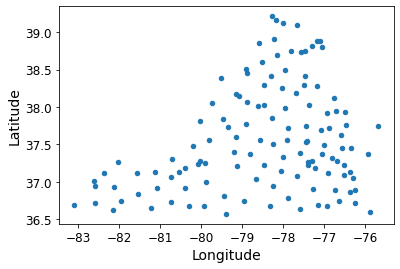

In [ ]:
virginia_cancer_data_combined.plot(kind="scatter", x="Longitude", y="Latitude")

In [ ]:
y = virginia_cancer_data_scaled['TARGET_deathRate']
X = virginia_cancer_data_scaled.drop(['TARGET_deathRate'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import numpy as np

types = ['linear', 'poly', 'rbf']
bestTypes = []
bestParams = []
for i in types:
  parameters = {'C':[1,3, 6,8, 10], "gamma": [.001, .01, .15], "degree": [.8, 1.1, 1.5]}
  svr = SVR(kernel=i)
  clf = GridSearchCV(svr, parameters)
  clf.fit(X_train, y_train)
  y_predict = clf.predict(X_test)
  
  bestTypes.append(clf.best_estimator_)
  bestParams.append(clf.best_params_)

  print('------------'+i+'------------')
  print("Root mean squared error: "+str(np.sqrt(mean_squared_error(y_predict,y_test))))
  print("Best parameters set found on development set:\n"+str(clf.best_params_))
  print()

------------linear------------
Root mean squared error: 0.9251589071146693
Best parameters set found on development set:
{'C': 1, 'degree': 0.8, 'gamma': 0.001}

------------poly------------
Root mean squared error: 0.7809516075946309
Best parameters set found on development set:
{'C': 1, 'degree': 1.1, 'gamma': 0.01}

------------rbf------------
Root mean squared error: 0.7766315752294186
Best parameters set found on development set:
{'C': 6, 'degree': 0.8, 'gamma': 0.01}



In [ ]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
from matplotlib import pyplot as plt

class K_Means:
    def __init__(self, k =3, max_iterations = 500):
      self.k = k
      self.max_iterations = max_iterations
      self.p=1
      self.assigned = []
      self.index = 0
      self.originalPoints = []
      self.v = []
    
    def initialize_centroids(self, points, k):
      centroids = points.copy()
      np.random.shuffle(centroids)
      t = centroids[:k]
      return t

    def find_closest_centroid(self, points, centroids):
      #rootPow = 1.0/(self.p*1.0)
      distances = np.power((np.abs(np.power(points - centroids[:, np.newaxis],self.p))).sum(axis=2), 1/(self.p*1.0))
      #distances = np.power(points - centroids[:, np.newaxis],self.p.sum(axis=2)
      return np.argmin(distances, axis=0)

    def assign_centroids(self, points, centroids):
      return np.array([points[self.index==k].mean(axis=0) for k in range(centroids.shape[0])])

    def step(self, points, centroids):
      self.index = self.find_closest_centroid(points, centroids)
      self.centroids = self.assign_centroids(points, centroids)
      #print(self.centroids)

    def determineChanged(self, previousCentroids):
      return not np.array_equal(previousCentroids, self.centroids)

    def fit(self, points, p, k, v, showData=True):
      self.v = v
      self.p = p
      self.originalPoints = points.to_numpy()
      points = points[v].to_numpy()
      
      changed = True #change in between iterations
      
      self.centroids = self.initialize_centroids(points, k)
      #print(str(self.centroids))

      previousCentroids = self.centroids.copy()
      count = 0
      while(changed and count<1000):
        self.step(points, self.centroids)
        changed = self.determineChanged(previousCentroids)
        count+=1
        previousCentroids = self.centroids.copy()
      
      if showData:
        self.plot(points)
      else:
        return self.getSse(points)

    def plot(self, points):
      #BBox = (self.originalPoints[:,0].min(),   self.originalPoints[:,0].max(),      
      #   self.originalPoints[:,1].min(), self.originalPoints[:,1].max())
      plt.figure(figsize=(16,16), dpi=80)
      plt.title("Location Based Clustering Visualization")
      path = "virginiaMap.PNG"
      ruh_m = plt.imread(path)
      size = (points['TARGET_deathRate']+4)*40
      plt.scatter(self.originalPoints[:, 0], self.originalPoints[:,1], c=self.index, s=size)
      #plt.scatter(self.originalPoints['Latitude'], self.originalPoints[], c=self.index+3, s=60, edgecolors='b')
      plt.imshow(ruh_m, extent=[-84, -75, 36.5, 39.5])
      #plt.scatter(centroids[:,0], centroids[:,1], c='g')
      self.getData(points)

    def plotElbow(self, points, p, v):
      self.p = p
      plt.title("Elbow Plot")
      plt.xlabel = "k"
      plt.ylabel ="Sum Squared Error"
      plt
      tuples = []
      iters = [2,3,4,5,6,7,8,9,10, 12,18]
      for i in iters:
        tuples.append(self.fit(points, p, i, v, showData=False))
      plt.plot(iters, tuples)
    
    def getData(self, points):
      print("Categories:\n"+str(self.v))
      print("Cluster means:\n" + str(self.centroids))
      std = np.array([points[self.index==k].std(axis=0) for k in range(self.centroids.shape[0])])
      print("Standard Deviations:\n"+str(std))

      sse = self.getSse(points)
      print("Sum Squared Error:\n"+str(sse))
    
    def getSse(self, points):
      sse = 0
      sse = np.sum(np.sum(np.power(points[self.index==k]-self.centroids[k],2)) for k in range(self.centroids.shape[0]))
      return sse



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


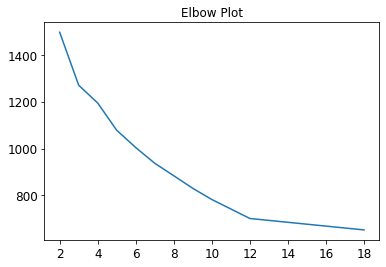

In [ ]:
kmeans.plotElbow(virginia_cancer_data_combined, 2, ['avgAnnCount',	'TARGET_deathRate', 'incidenceRate',	'medIncome',	'povertyPercent',	'studyPerCap',	'MedianAge',	'MedianAgeMale',	'AvgHouseholdSize',	'PctNoHS18_24',	'PctHS25_Over',	'PctWhite',	'PctBlack',	'BirthRate'])

Categories:
['avgAnnCount', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'AvgHouseholdSize', 'PctNoHS18_24', 'PctHS25_Over', 'PctWhite', 'PctBlack', 'BirthRate']
Cluster means:
[[-0.23485091  1.52445905  1.04548368 -0.63786171  0.61410156 -0.18949642
  -0.13399033 -0.19656451 -0.68055539  0.84011368  0.6589901  -0.42184959
   0.4507634   1.08534847]
 [-0.1530673  -0.37564061 -0.01759148  0.69750535 -0.93232723 -0.22261358
  -0.11020723  0.193836    0.43056043  0.17823649 -0.03146816  0.45930675
  -0.46122281 -0.23880437]
 [-0.17342594 -0.38695888  1.90203882 -0.5419476   1.60282422  0.32579339
  -0.37637875 -2.29833806 -0.56558773 -1.50563275 -1.19952428  0.03052197
  -0.2144028  -1.17084344]
 [-0.37288067  0.24185477  0.01019494 -0.44173662  0.21020834 -0.25365344
  -0.05022366  0.71776635 -0.38683926 -0.06907571  0.5510603  -0.53098129
   0.67547636  0.01989878]
 [-0.33171778  0.28834202 -0.79547965 -0.69529086  0.41

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


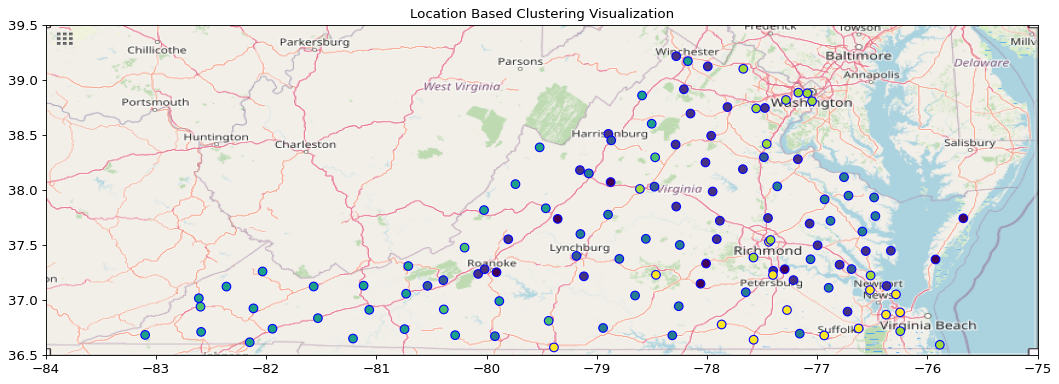

In [ ]:
kmeans.fit(virginia_cancer_data_combined, 2, 8, ['avgAnnCount',	'TARGET_deathRate','incidenceRate',	'medIncome',	'povertyPercent',	'studyPerCap',	'MedianAge',	'MedianAgeMale',	'AvgHouseholdSize',	'PctNoHS18_24',	'PctHS25_Over',	'PctWhite',	'PctBlack',	'BirthRate'])

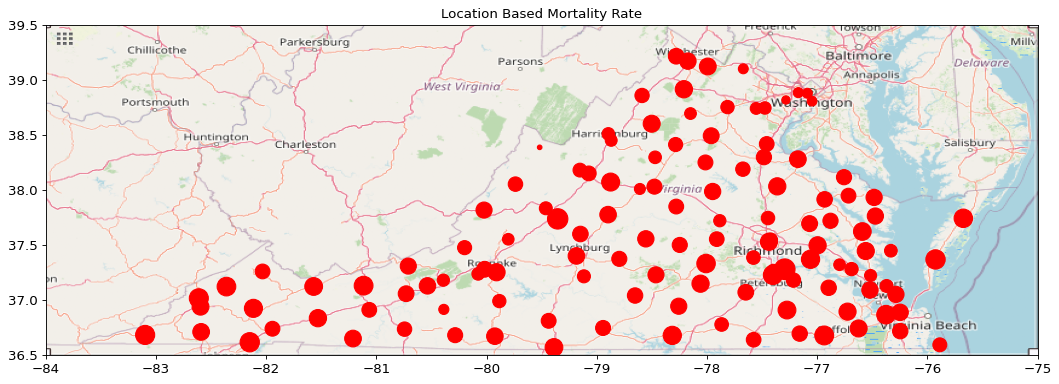

In [ ]:
plt.figure(figsize=(16,16), dpi=80)
plt.title("Location Based Mortality Rate")
path = "virginiaMap.PNG"
ruh_m = plt.imread(path)
size = (virginia_cancer_data_scaled['TARGET_deathRate']+3.2)*60
plt.scatter(combined['Longitude'], combined['Latitude'], c='r', s=size)
plt.imshow(ruh_m, extent=[-84, -75, 36.5, 39.5])